# Parse 100K Customer Data

In [13]:
import os, psutil

def get_current_memory_consumption():
    process = psutil.Process(os.getpid())
    process_memory_mb = process.memory_info().rss / (1024**2)
    print(f"Current Python process memory usage: {process_memory_mb:.2f} MB")

get_current_memory_consumption()

Current Python process memory usage: 172.15 MB


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

customer_100k = pd.read_csv("./data/customers-100000.csv")
customer_100k.head()

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website
0,1,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/
1,2,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/
2,3,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/
3,4,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/
4,5,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/


In [12]:
customer_100k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Index              100000 non-null  int64 
 1   Customer Id        100000 non-null  object
 2   First Name         100000 non-null  object
 3   Last Name          100000 non-null  object
 4   Company            100000 non-null  object
 5   City               100000 non-null  object
 6   Country            100000 non-null  object
 7   Phone 1            100000 non-null  object
 8   Phone 2            100000 non-null  object
 9   Email              100000 non-null  object
 10  Subscription Date  100000 non-null  object
 11  Website            100000 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB


In [14]:
customer_100k.describe()

,Index
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


In [15]:
customer_100k.nunique()

Index                100000
Customer Id          100000
First Name              690
Last Name              1000
Company               71994
City                  49154
Country                 243
Phone 1              100000
Phone 2              100000
Email                 99995
Subscription Date       880
Website               50471
dtype: int64

<Axes: title={'center': 'Top 25 Country Subcriber'}, xlabel='Country'>

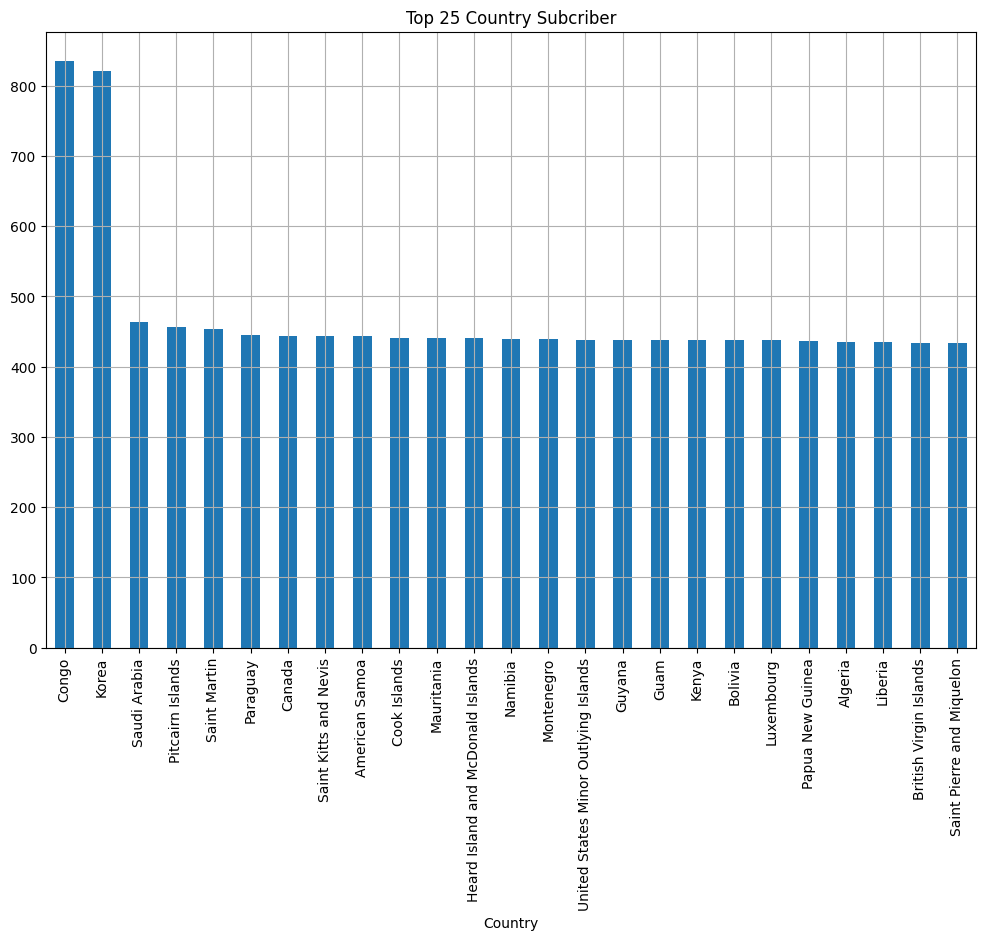

In [16]:
customer_100k['Country'].value_counts()[:25].plot(kind='bar', figsize=(12, 8), title='Top 25 Country Subcriber', grid=True)

<Axes: title={'center': 'Top 25 Company Subcriber'}, xlabel='Company'>

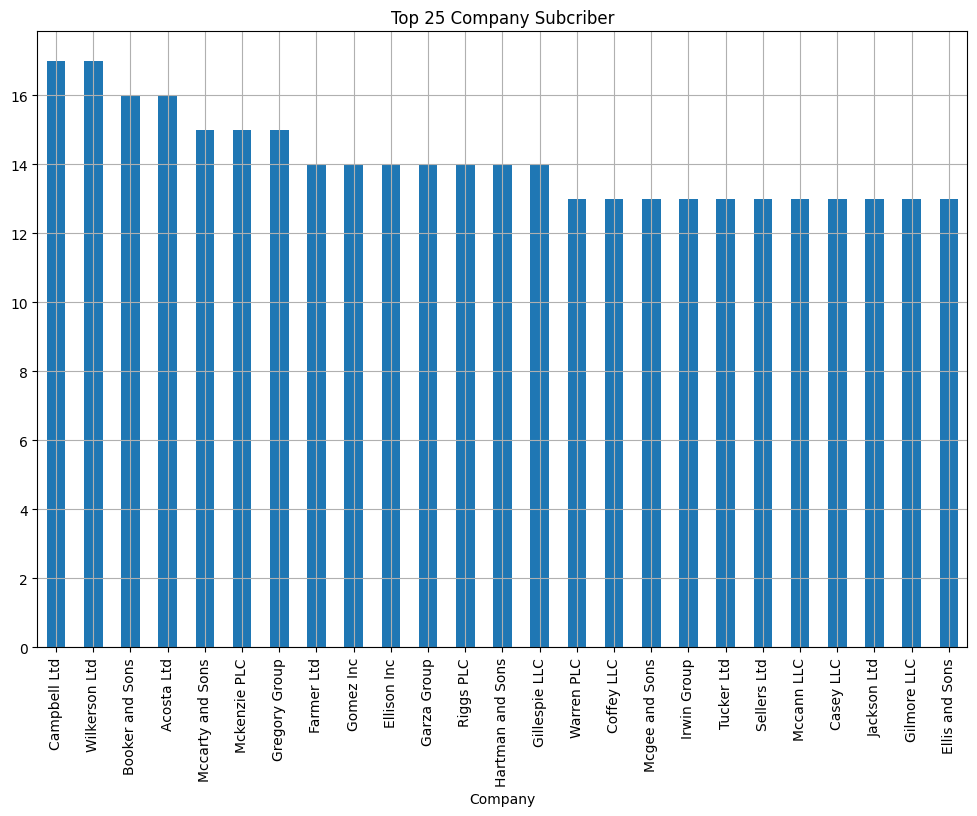

In [18]:
customer_100k['Company'].value_counts()[:25].plot(kind='bar', figsize=(12, 8), title='Top 25 Company Subcriber', grid=True)

In [19]:
customer_100k['Date'] = pd.to_datetime(customer_100k['Subscription Date'], format="%Y-%m-%d", errors='coerce')

customer_100k['sd_year'] = customer_100k['Date'].dt.year
customer_100k['sd_month'] = customer_100k['Date'].dt.month
customer_100k['sd_day'] = customer_100k['Date'].dt.day

<Axes: title={'center': 'Annual Subcription'}, xlabel='sd_year'>

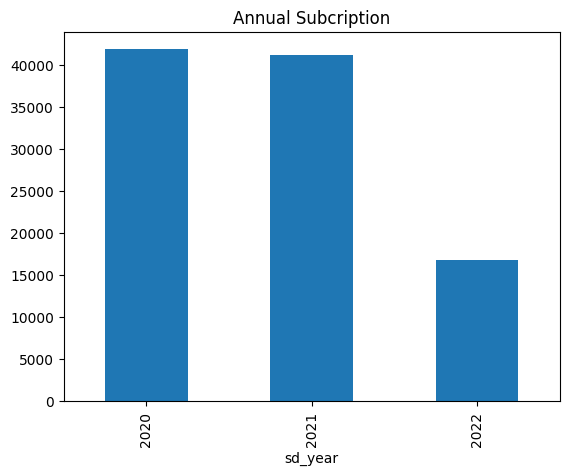

In [20]:
customer_100k['sd_year'].value_counts().plot(kind='bar', title='Annual Subcription')

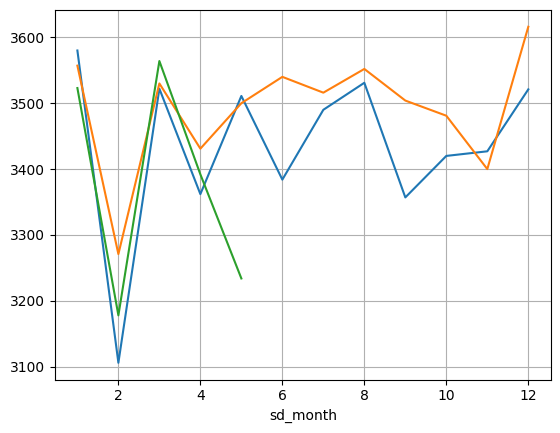

In [21]:
for year in customer_100k['sd_year'].unique():
    customer_100k[customer_100k['sd_year'] == year]['sd_month'].value_counts().sort_index().plot(kind='line', grid=True)

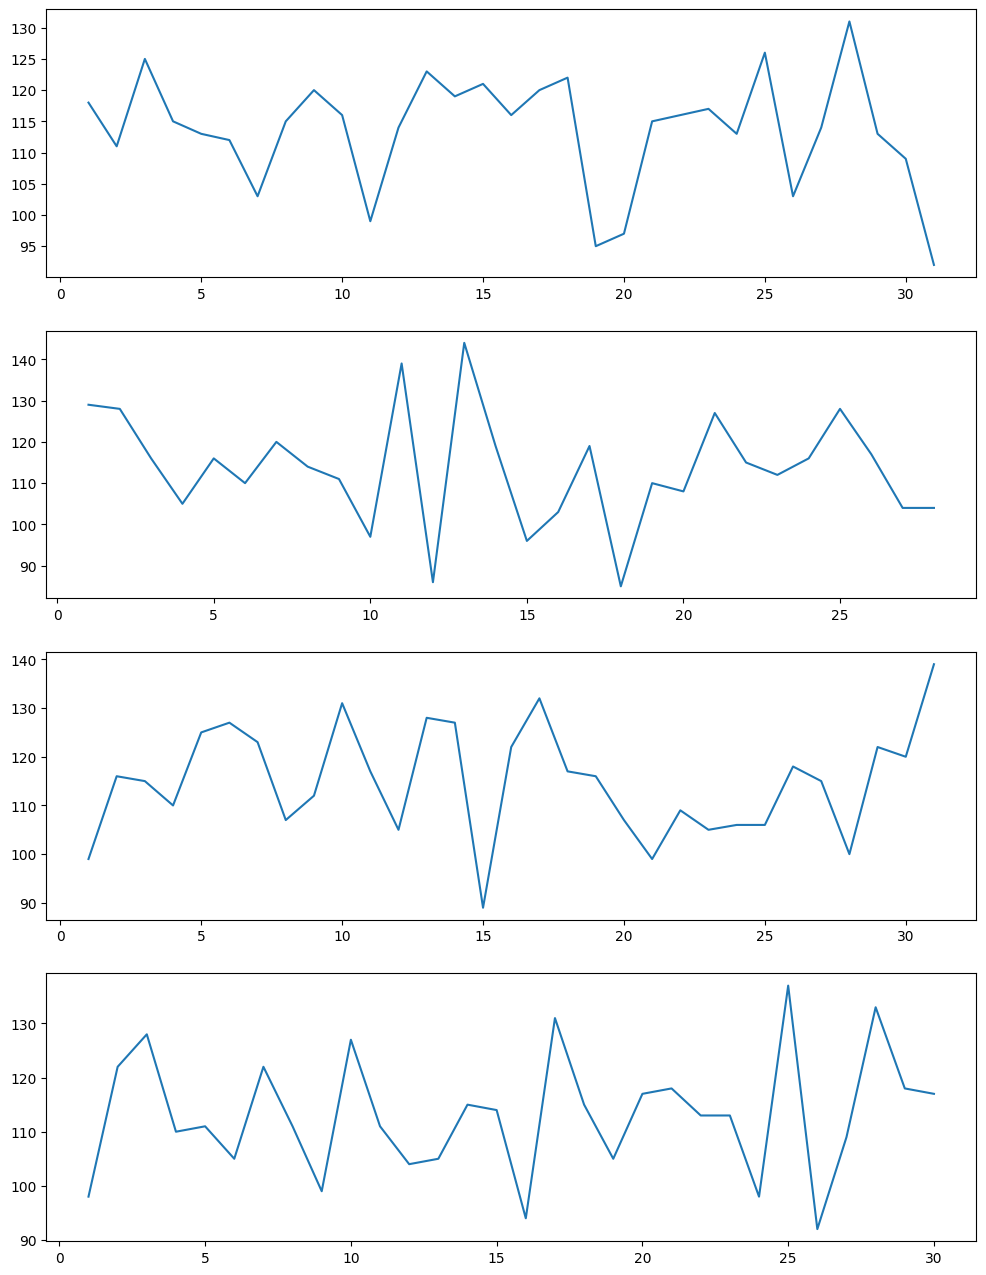

In [22]:
fig, axs = plt.subplots(4, figsize=(12, 16))
for i, ax in enumerate(axs):
    month = i + 1
    data = customer_100k[(customer_100k['sd_year'] == 2022) & (customer_100k['sd_month'] == month)]['sd_day'].value_counts().sort_index()
    ax.plot(data.index, data.values)

In [61]:
axs[0]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

# Parse 2M Customer Data while keeping memory low

* That a low memory < 1024 RAM

In [2]:
import os, psutil

def get_current_memory_consumption():
    process = psutil.Process(os.getpid())
    process_memory_mb = process.memory_info().rss / (1024**2)
    print(f"Current Python process memory usage: {process_memory_mb:.2f} MB")

get_current_memory_consumption()

Current Python process memory usage: 132.50 MB


In [3]:
import pandas as pd

def get_current_df_consumption(df):
    """Return the number of memory usage in mega bytes"""
    return df.memory_usage(deep=True).sum() / 1024 ** 2

# get_current_memory_consumption()
CHUNK_SIZE = 2000000
DTYPE_MAPPING = {
    # "Email": "category",
    # "Website": "category",
    "Country": "category",
    "Company": "category",
    "City": "category",
}
COLUMNS = [
    "Customer Id", "Company", "City", "Country",  "Subscription Date", 
]

df_iterator = pd.read_csv("./data/customers-2000000.csv",
                          usecols=COLUMNS,
                          dtype=DTYPE_MAPPING,
                          parse_dates=['Subscription Date'],
                          chunksize=CHUNK_SIZE)

print(get_current_memory_consumption())

Current Python process memory usage: 133.59 MB
None


In [4]:
df_customer_data = df_iterator.get_chunk(2000000)

get_current_memory_consumption()

Current Python process memory usage: 533.48 MB


In [5]:
df_customer_data['sd_year'] = df_customer_data['Subscription Date'].dt.year
df_customer_data['sd_month'] = df_customer_data['Subscription Date'].dt.month
df_customer_data['sd_day'] = df_customer_data['Subscription Date'].dt.day

df_customer_data.drop(columns='Subscription Date', inplace=True)

In [6]:
get_current_df_consumption(df_customer_data)

np.float64(308.93156814575195)

In [7]:
df_customer_data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 7 columns):
 #   Column       Dtype   
---  ------       -----   
 0   Customer Id  object  
 1   Company      category
 2   City         category
 3   Country      category
 4   sd_year      int32   
 5   sd_month     int32   
 6   sd_day       int32   
dtypes: category(3), int32(3), object(1)
memory usage: 103.3+ MB


<Axes: title={'center': 'Top 5 Country Subcriber'}, xlabel='Country'>

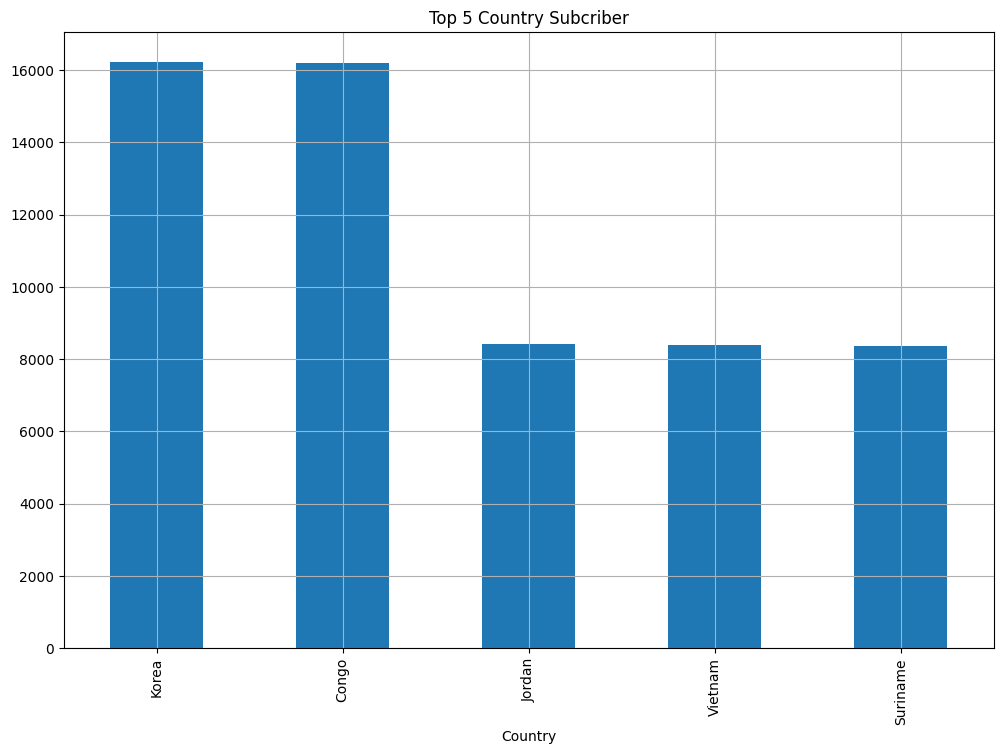

In [8]:
df_customer_data['Country'].value_counts()[:5].plot(kind='bar', figsize=(12, 8), title='Top 5 Country Subcriber', grid=True)

<Axes: title={'center': 'Top 25 City Subcriber'}, xlabel='City'>

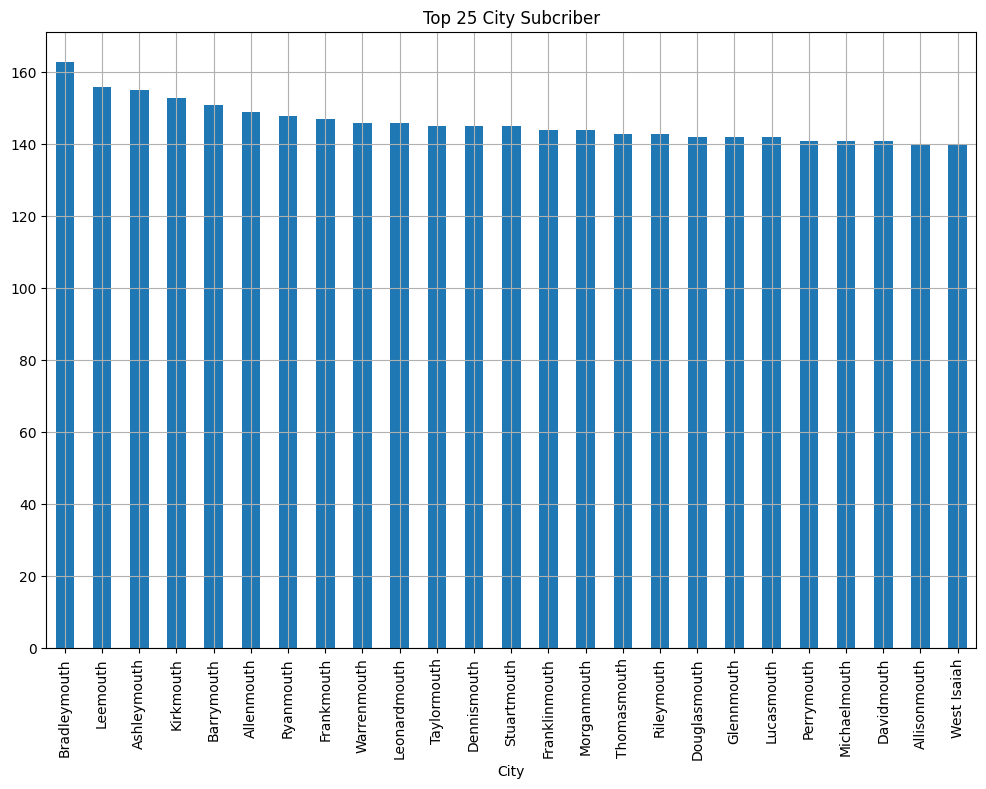

In [9]:
df_customer_data['City'].value_counts()[:25].plot(kind='bar', figsize=(12, 8), title='Top 25 City Subcriber', grid=True)

<Axes: title={'center': 'Top 25 Company Subcriber'}, xlabel='Company'>

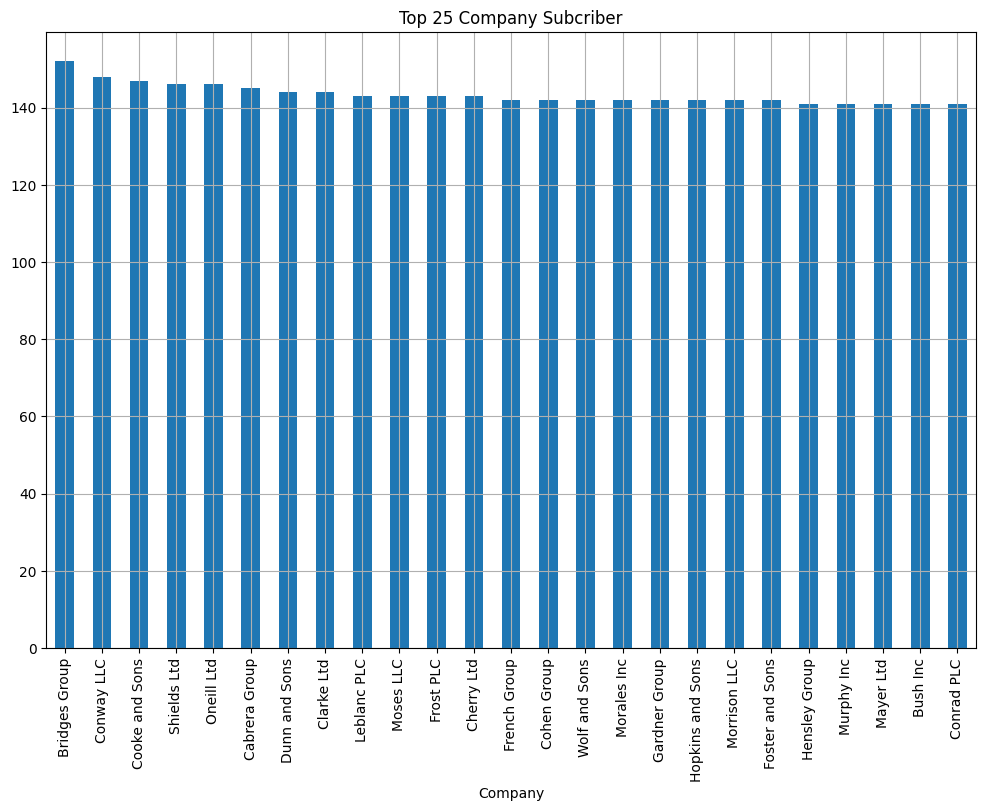

In [10]:
df_customer_data['Company'].value_counts()[:25].plot(kind='bar', figsize=(12, 8), title='Top 25 Company Subcriber', grid=True)

# How it's different splitting the small files and large files

**Small files** : The data in small files can be loaded all at once without having to optimize the data loading process.

**Large files** : The data in large files can't be loaded all at once because it can crash the application. Instead there are some way to avoid out of memory. These are:
* Use chunking method - Load data as a chunk.
* Use different data type -  Especially, pandas with its object datatype is really big datatype.
* Use different library -  You can use polars but still need to optimize the data type.